# Recommender Systems Showdown

### Comparing error rates and model performance of popular recommendation system algorithms

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

from collections import defaultdict

## Loading the Movielens dataset

In [2]:
ratings = pd.read_csv("movielens/ratings.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
ratings.shape

(100836, 4)

## RMSE and MAE

In [4]:
from surprise import Reader, Dataset
from surprise import accuracy
from surprise.model_selection import cross_validate
from surprise.model_selection import KFold

from surprise import SVD, KNNBasic, NMF, SlopeOne, CoClustering

In [5]:
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

In [6]:
cv_df = pd.DataFrame(columns=['Algorithm', 'RMSE', 'MAE', 'Fit time', 'Test time'])

In [7]:
def add_cv_row(cv):
    new_row = [cv['algo'], cv['test_rmse'].mean(), cv['test_mae'].mean(), np.mean(cv['fit_time']), np.mean(cv['test_time'])]
    cv_df.loc[len(cv_df)] = new_row

In [8]:
svd = SVD()
svd_cv = cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
svd_cv["algo"] = "SVD"
add_cv_row(svd_cv)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8774  0.8682  0.8768  0.8681  0.8762  0.8733  0.0043  
MAE (testset)     0.6752  0.6670  0.6729  0.6675  0.6716  0.6708  0.0031  
Fit time          3.60    3.63    3.61    3.62    3.62    3.62    0.01    
Test time         0.12    0.08    0.08    0.12    0.08    0.10    0.02    


In [9]:
knn = KNNBasic()
knn_cv = cross_validate(knn, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
knn_cv["algo"] = "KNN Basic"
add_cv_row(knn_cv)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9424  0.9346  0.9516  0.9487  0.9573  0.9469  0.0078  
MAE (testset)     0.7256  0.7177  0.7252  0.7257  0.7347  0.7258  0.0054  
Fit time          0.06    0.09    0.06    0.06    0.06    0.06    0.01    
Test time         0.88    1.05    0.88    0.86    0.93    0.92    0.07    


In [10]:
nmf = NMF()
nmf_cv = cross_validate(nmf, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
nmf_cv["algo"] = "NMF"
add_cv_row(nmf_cv)

Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9251  0.9124  0.9159  0.9291  0.9333  0.9232  0.0079  
MAE (testset)     0.7046  0.7009  0.7016  0.7118  0.7134  0.7064  0.0052  
Fit time          3.56    3.56    3.59    3.56    3.58    3.57    0.01    
Test time         0.07    0.07    0.12    0.07    0.12    0.09    0.03    


In [11]:
so = SlopeOne()
so_cv = cross_validate(so, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
so_cv["algo"] = "SlopeOne"
add_cv_row(so_cv)

Evaluating RMSE, MAE of algorithm SlopeOne on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8986  0.9034  0.9011  0.8980  0.9015  0.9005  0.0020  
MAE (testset)     0.6829  0.6913  0.6895  0.6873  0.6892  0.6880  0.0029  
Fit time          2.97    3.13    3.10    2.88    3.09    3.03    0.09    
Test time         4.80    4.74    4.85    4.78    4.76    4.78    0.04    


In [12]:
cc = CoClustering()
cc_cv = cross_validate(cc, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
cc_cv["algo"] = "CoClustering"
add_cv_row(cc_cv)

Evaluating RMSE, MAE of algorithm CoClustering on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9421  0.9357  0.9347  0.9479  0.9543  0.9430  0.0074  
MAE (testset)     0.7279  0.7255  0.7231  0.7361  0.7379  0.7301  0.0059  
Fit time          1.20    1.17    1.18    1.17    1.16    1.18    0.01    
Test time         0.06    0.13    0.06    0.06    0.13    0.09    0.03    


In [13]:
cv_df

,Algorithm,RMSE,MAE,Fit time,Test time
0,SVD,0.873335,0.670838,3.615652,0.096293
1,KNN Basic,0.946914,0.725783,0.064240,0.919680
2,NMF,0.923165,0.706448,3.570487,0.088727
3,SlopeOne,0.900513,0.688041,3.033017,4.784847
4,CoClustering,0.942964,0.730101,1.176908,0.089585


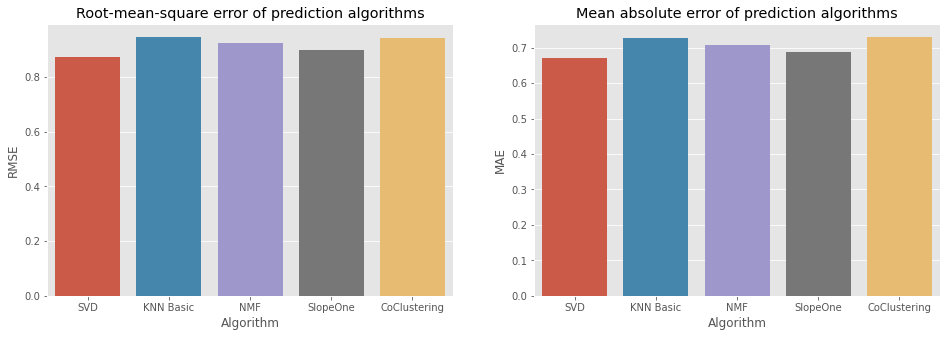

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
sns.barplot(x='Algorithm', y='RMSE', data=cv_df, ax=ax1)
ax1.set_title('Root-mean-square error of prediction algorithms')

sns.barplot(x='Algorithm', y='MAE', data=cv_df, ax=ax2)
ax2.set_title('Mean absolute error of prediction algorithms');

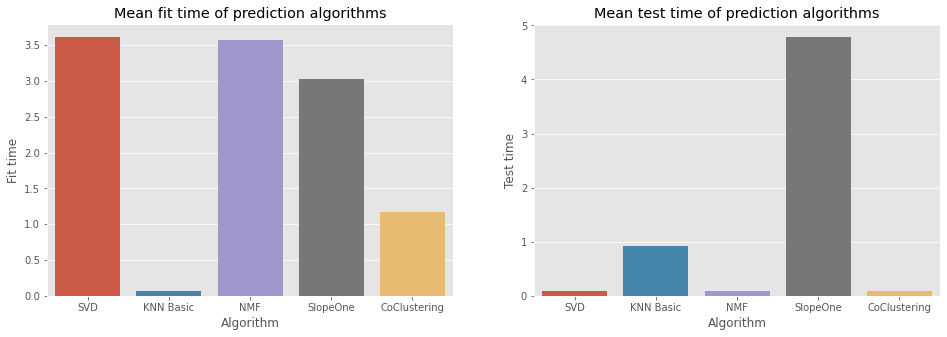

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
sns.barplot(x='Algorithm', y='Fit time', data=cv_df, ax=ax1)
ax1.set_title('Mean fit time of prediction algorithms')

sns.barplot(x='Algorithm', y='Test time', data=cv_df, ax=ax2)
ax2.set_title('Mean test time of prediction algorithms');

## Precision and Recall

In [16]:
def precision_recall_at_k(predictions, k=10, threshold=3.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set it to 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set it to 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    return precisions, recalls

In [17]:
def get_precision_recall(algo, n_splits=5, k=10, threshold=4):
    kf = KFold(n_splits=n_splits)   
    precs = []
    recs = []
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        predictions = algo.test(testset)
        precisions, recalls = precision_recall_at_k(predictions, k=k, threshold=threshold)
        
        # Precision and recall can then be averaged over all users
        precs.append(sum(prec for prec in precisions.values()) / len(precisions))
        recs.append(sum(rec for rec in recalls.values()) / len(recalls))
        
    return np.mean(precs), np.mean(recs)

In [18]:
prec_rec_df = pd.DataFrame(columns=['Algorithm', 'Precision', 'Recall'])

In [19]:
def add_prec_rec_row(algo, prec, rec):
    prec_rec_df.loc[len(prec_rec_df)] = [algo, prec, rec]

In [20]:
prec, rec = get_precision_recall(svd)
add_prec_rec_row('SVD', prec, rec)

prec, rec = get_precision_recall(knn)
add_prec_rec_row('KNN', prec, rec)

prec, rec = get_precision_recall(nmf)
add_prec_rec_row('NMF', prec, rec)

prec, rec = get_precision_recall(so)
add_prec_rec_row('SlopeOne', prec, rec)

prec, rec = get_precision_recall(cc)
add_prec_rec_row('CoClustering', prec, rec)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


In [21]:
prec_rec_df

,Algorithm,Precision,Recall
0,SVD,0.593146,0.290479
1,KNN,0.660286,0.318294
2,NMF,0.588692,0.304825
3,SlopeOne,0.607290,0.322507
4,CoClustering,0.575057,0.327721


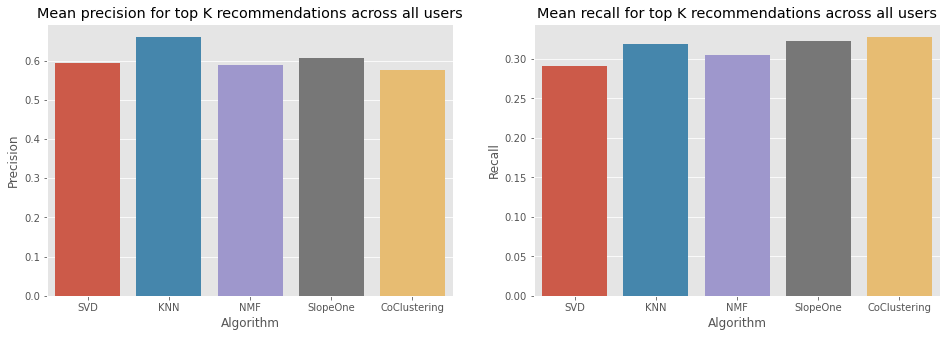

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
sns.barplot(x='Algorithm', y='Precision', data=prec_rec_df, ax=ax1)
ax1.set_title('Mean precision for top K recommendations across all users')

sns.barplot(x='Algorithm', y='Recall', data=prec_rec_df, ax=ax2)
ax2.set_title('Mean recall for top K recommendations across all users');

## Getting top recommendations for users

In [23]:
trainset = data.build_full_trainset()

In [24]:
algo = SVD()
algo.fit(trainset)

In [25]:
testset = trainset.build_anti_testset()
predictions = algo.test(testset)

In [26]:
def get_recs_df(predictions):
    preds = [{'uid': x.uid, 'iid': x.iid, 'est': x.est} for x in predictions]
    df = pd.DataFrame(preds, columns=['uid', 'iid', 'est'])
    return df

def get_top_recs(rec_df, uid, n=10):
    return rec_df[rec_df['uid'] == uid].sort_values(by='est', ascending=False)[:n]

In [27]:
rec_df = get_recs_df(predictions)

In [28]:
get_top_recs(rec_df, uid=1)

,uid,iid,est
0,1,318,5.0
872,1,1223,5.0
121,1,1225,5.0
789,1,4011,5.0
795,1,858,5.0
124,1,1266,5.0
2163,1,1204,5.0
862,1,541,5.0
869,1,1193,5.0
97,1,898,5.0
